## Importing necessary libraries for data manipulation and visualizations

In [1]:
# Importing necessary libraries for numerical, manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset into df variable
df = pd.read_csv('/Users/raghunandanms/Downloads/election.csv', encoding='Latin1')
df.head() # checking only 5 rows

,Date,State,Lokshabha Seat Name,Incident Description,Action taken,Location of Incident,Coordinates,Source news article
0,19-04-2024,Manipur,Thamanpokpi,Gun Firing,Repolling,NaN,NaN,"Viral video: Firing at Manipur polling booth, ..."
1,19-04-2024,Manipur,Inner Manipur,Alleged Irregularties,Voting Station Shutdown,Thongju,"24.757850044919493, 93.93944606626353",Polling station shut in Manipur's Imphal after...
2,19-04-2024,Arunachal Pradesh,Arunachal West,Violence and EVM damage,Repolling,8 Polling Booths,NaN,Election Commission announces re-polling at 8 ...
3,26-04-2024,Karnataka,Chamarajanagar,Voters Clash,Repolling,Hanur,"12.10029677313339, 77.28847513794574",Lok Sabha election: EC orders re-polling at on...
4,26-04-2024,Rajasthan,Barmer,Booth Capturing,Repolling,Dudhwa Khurd,"25.539611550481595, 71.13896122725231",Re-Polling: 85.7% re-polling at booth in Barme...


In [3]:
# To check the number of rows and columns.
df.shape

(39, 8)

In [4]:
# Checking the number of unique state names
df.State.nunique()

12

## Data Cleaning & Manipulation

In [5]:
# To check the null values in the rows
df.isnull().sum()

Date                     0
State                    1
Lokshabha Seat Name      0
Incident Description     0
Action taken            15
Location of Incident    17
Coordinates             23
Source news article      3
dtype: int64

In [6]:
# Dropping the rows since the percentage of missing or null values are less than 30% and imputing can't work since the data types of missing values should be object or a string
df.dropna(axis=0, inplace=True)
df.head()

,Date,State,Lokshabha Seat Name,Incident Description,Action taken,Location of Incident,Coordinates,Source news article
1,19-04-2024,Manipur,Inner Manipur,Alleged Irregularties,Voting Station Shutdown,Thongju,"24.757850044919493, 93.93944606626353",Polling station shut in Manipur's Imphal after...
3,26-04-2024,Karnataka,Chamarajanagar,Voters Clash,Repolling,Hanur,"12.10029677313339, 77.28847513794574",Lok Sabha election: EC orders re-polling at on...
4,26-04-2024,Rajasthan,Barmer,Booth Capturing,Repolling,Dudhwa Khurd,"25.539611550481595, 71.13896122725231",Re-Polling: 85.7% re-polling at booth in Barme...
5,26-04-2024,Rajasthan,Ajmer,Misplacement of election related document by ECI,Repolling,Masuda,"26.08782361184028, 74.49928295322698",Lok Sabha Elections 2024 Re polling ends at na...
7,07-05-2024,Gujrat,Dahod,bogus voting,Repolling,Parthampur,"23.14431060828702, 73.9325935737083",Lok Sabha Polls 2024: Man Goes Live On Instagr...


In [7]:
# Checking the values after removing/dropping missing values/garbage values
df.isnull().sum()

Date                    0
State                   0
Lokshabha Seat Name     0
Incident Description    0
Action taken            0
Location of Incident    0
Coordinates             0
Source news article     0
dtype: int64

In [8]:
# Assuming for this visualization, I don't need the coordinates feature. However it might come to use in PowerBI
df.drop(columns='Coordinates', axis=1, inplace=True)
df.head()

,Date,State,Lokshabha Seat Name,Incident Description,Action taken,Location of Incident,Source news article
1,19-04-2024,Manipur,Inner Manipur,Alleged Irregularties,Voting Station Shutdown,Thongju,Polling station shut in Manipur's Imphal after...
3,26-04-2024,Karnataka,Chamarajanagar,Voters Clash,Repolling,Hanur,Lok Sabha election: EC orders re-polling at on...
4,26-04-2024,Rajasthan,Barmer,Booth Capturing,Repolling,Dudhwa Khurd,Re-Polling: 85.7% re-polling at booth in Barme...
5,26-04-2024,Rajasthan,Ajmer,Misplacement of election related document by ECI,Repolling,Masuda,Lok Sabha Elections 2024 Re polling ends at na...
7,07-05-2024,Gujrat,Dahod,bogus voting,Repolling,Parthampur,Lok Sabha Polls 2024: Man Goes Live On Instagr...


In [9]:
# Checking the data types of the columns, it is very important to maintain the specific datatype
df.dtypes

Date                    object
State                   object
Lokshabha Seat Name     object
Incident Description    object
Action taken            object
Location of Incident    object
Source news article     object
dtype: object

In [10]:
# Dropping the source feature since it has nothing that can be used for visualization or draw some insights
df.drop(columns='Source news article', axis=1, inplace=True)
df.head()

,Date,State,Lokshabha Seat Name,Incident Description,Action taken,Location of Incident
1,19-04-2024,Manipur,Inner Manipur,Alleged Irregularties,Voting Station Shutdown,Thongju
3,26-04-2024,Karnataka,Chamarajanagar,Voters Clash,Repolling,Hanur
4,26-04-2024,Rajasthan,Barmer,Booth Capturing,Repolling,Dudhwa Khurd
5,26-04-2024,Rajasthan,Ajmer,Misplacement of election related document by ECI,Repolling,Masuda
7,07-05-2024,Gujrat,Dahod,bogus voting,Repolling,Parthampur


In [11]:
# Converting the date column to data time format
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/l9/jbjtscd161s6v6rm4x2bcmj80000gn/T/ipykernel_7749/2142593898.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df['Date'].dtype

dtype('<M8[ns]')

In [13]:
df.dtypes

Date                    datetime64[ns]
State                           object
Lokshabha Seat Name             object
Incident Description            object
Action taken                    object
Location of Incident            object
dtype: object

In [14]:
# Splitting the date into date, month and year for the future use, maybe visualization

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [15]:
df.head()

,Date,State,Lokshabha Seat Name,Incident Description,Action taken,Location of Incident,Day,Month,Year
1,2024-04-19,Manipur,Inner Manipur,Alleged Irregularties,Voting Station Shutdown,Thongju,19,4,2024
3,2024-04-26,Karnataka,Chamarajanagar,Voters Clash,Repolling,Hanur,26,4,2024
4,2024-04-26,Rajasthan,Barmer,Booth Capturing,Repolling,Dudhwa Khurd,26,4,2024
5,2024-04-26,Rajasthan,Ajmer,Misplacement of election related document by ECI,Repolling,Masuda,26,4,2024
7,2024-05-07,Gujrat,Dahod,bogus voting,Repolling,Parthampur,7,5,2024


In [16]:
df['Dayofweek'] = df['Date'].dt.dayofweek

In [17]:
df.head()

,Date,State,Lokshabha Seat Name,Incident Description,Action taken,Location of Incident,Day,Month,Year,Dayofweek
1,2024-04-19,Manipur,Inner Manipur,Alleged Irregularties,Voting Station Shutdown,Thongju,19,4,2024,4
3,2024-04-26,Karnataka,Chamarajanagar,Voters Clash,Repolling,Hanur,26,4,2024,4
4,2024-04-26,Rajasthan,Barmer,Booth Capturing,Repolling,Dudhwa Khurd,26,4,2024,4
5,2024-04-26,Rajasthan,Ajmer,Misplacement of election related document by ECI,Repolling,Masuda,26,4,2024,4
7,2024-05-07,Gujrat,Dahod,bogus voting,Repolling,Parthampur,7,5,2024,1


In [18]:
# Just making sure that the index is resetted since some of the rows were deleted
df.reset_index(drop=True, inplace=True)

In [19]:
df.head()

,Date,State,Lokshabha Seat Name,Incident Description,Action taken,Location of Incident,Day,Month,Year,Dayofweek
0,2024-04-19,Manipur,Inner Manipur,Alleged Irregularties,Voting Station Shutdown,Thongju,19,4,2024,4
1,2024-04-26,Karnataka,Chamarajanagar,Voters Clash,Repolling,Hanur,26,4,2024,4
2,2024-04-26,Rajasthan,Barmer,Booth Capturing,Repolling,Dudhwa Khurd,26,4,2024,4
3,2024-04-26,Rajasthan,Ajmer,Misplacement of election related document by ECI,Repolling,Masuda,26,4,2024,4
4,2024-05-07,Gujrat,Dahod,bogus voting,Repolling,Parthampur,7,5,2024,1


# Let's start visualization!

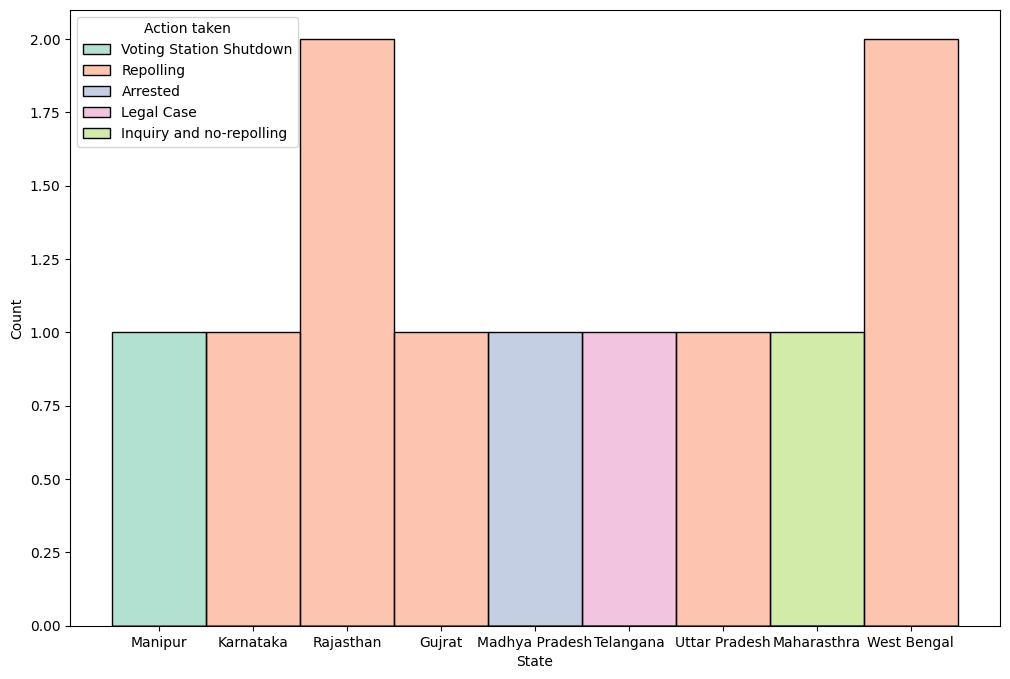

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='State', hue='Action taken', palette='Set2')
plt.show()

## From the above graph we can say that the Rajasthan and West Bengal has more number of repolling. Maharashtra is the only state there inquiry is running.Telangana has a legal case running and Madhya Pradesh has Arrested cases. While Manipur polling station has been shutdown.

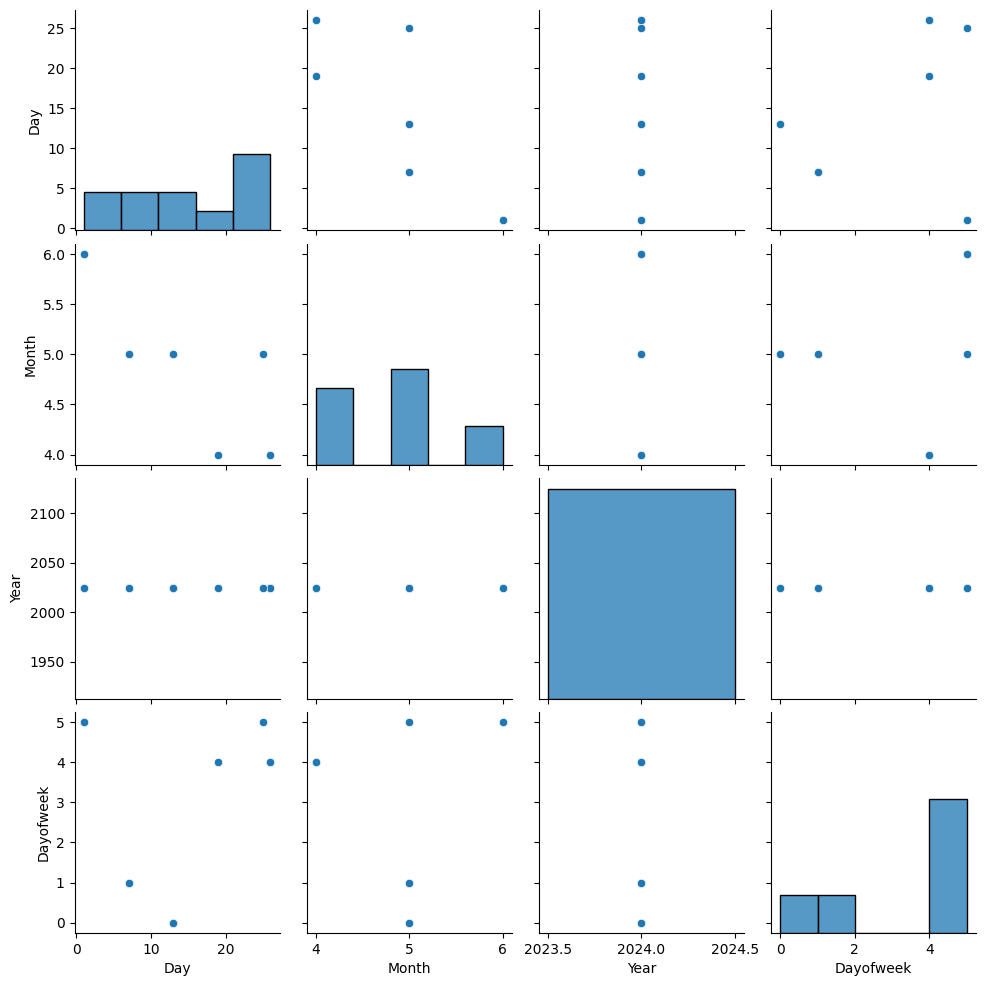

In [21]:
sns.pairplot(df)

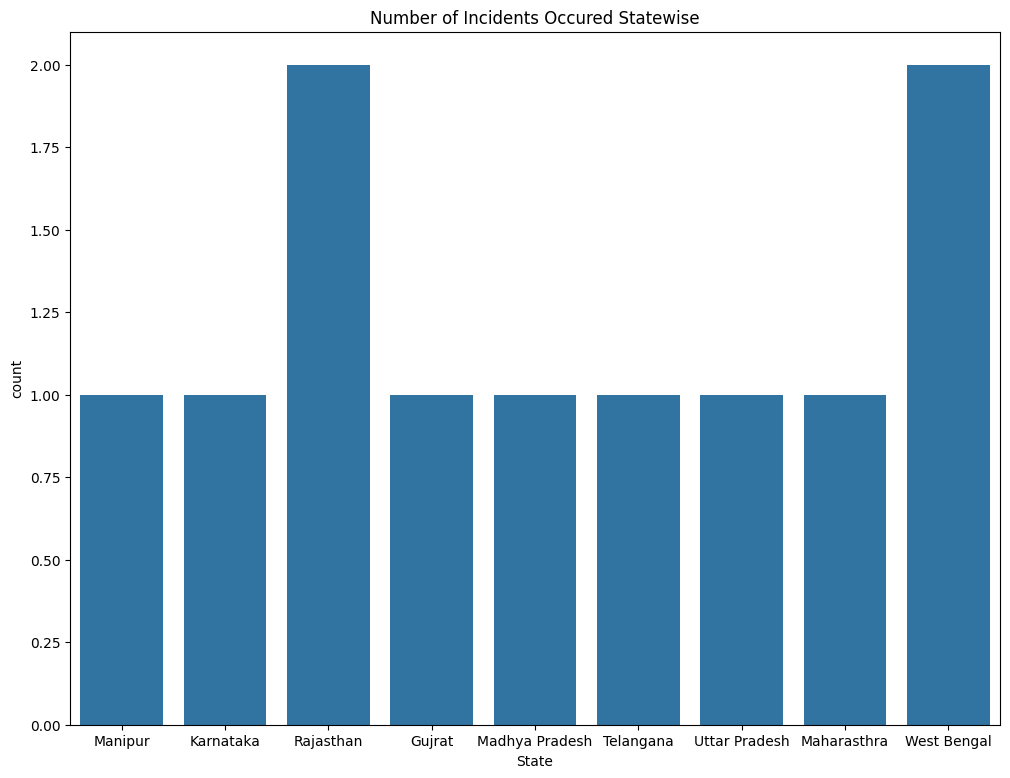

In [22]:
plt.figure(figsize=(12,9))
sns.countplot(data=df, x='State')
plt.title('Number of Incidents Occured Statewise')
plt.show()

## Rajasthan and West Bengal seems to have a lot of commotion or incidents happening during election polling.

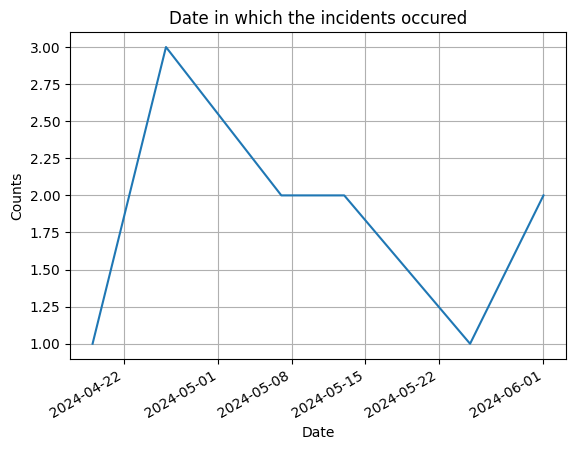

In [23]:
df['Date'].value_counts().sort_index().plot(kind='line')
plt.title('Date in which the incidents occured')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

## It can be seen that between 22nd April 2024 and 1st May 2024 there are a lot of incidents happened and between 22nd May 2024 and 1st of June the incidents have come down.

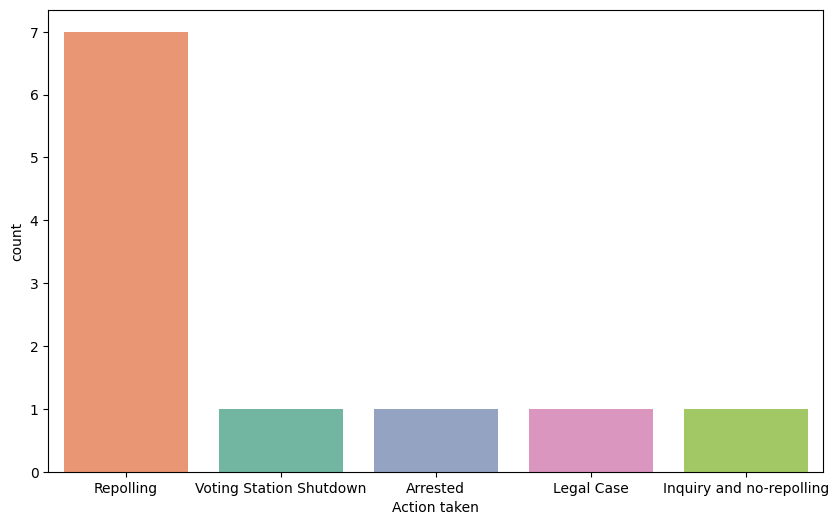

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='Action taken', hue='Action taken', data=df, palette='Set2', order=df['Action taken'].value_counts().index)
plt.show()

## Lot of assemblies or statewise polling is more than any other incidents like voting station shutdown etc.

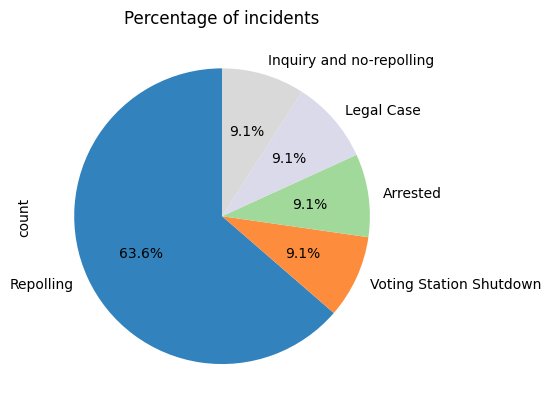

In [25]:
df['Action taken'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20c')
plt.title("Percentage of incidents")
plt.show()

## By looking from the above pie chart we can conclude that repolling has been a major contributor, say, 63.6% while others remain same through out 9.1%

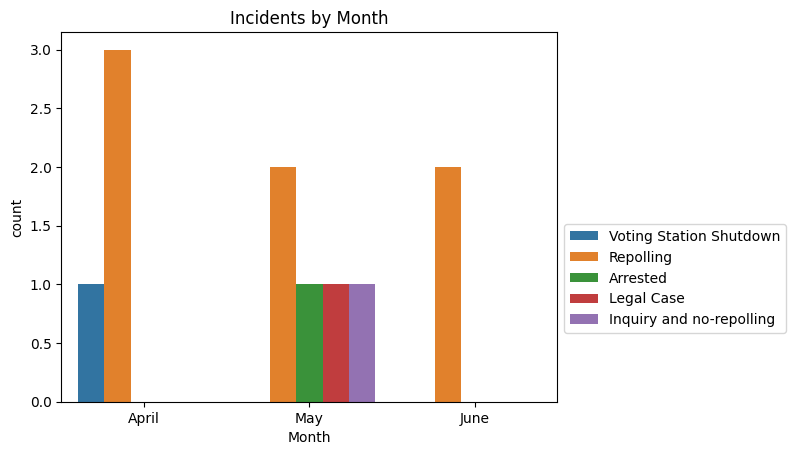

In [26]:
plt.title('Incidents by Month')
sns.countplot(x = 'Month', data=df, hue='Action taken')
plt.xticks([0, 1, 2],['April', 'May', 'June'])
plt.legend(bbox_to_anchor=(1,.5))
plt.show()

## This specific visulation is giving us an idea that a lot of incidents had occured simultaneously during the month May 2024, next with April and lastly June. One might say that a lot of polling using takes place in India during May and April and last in June.

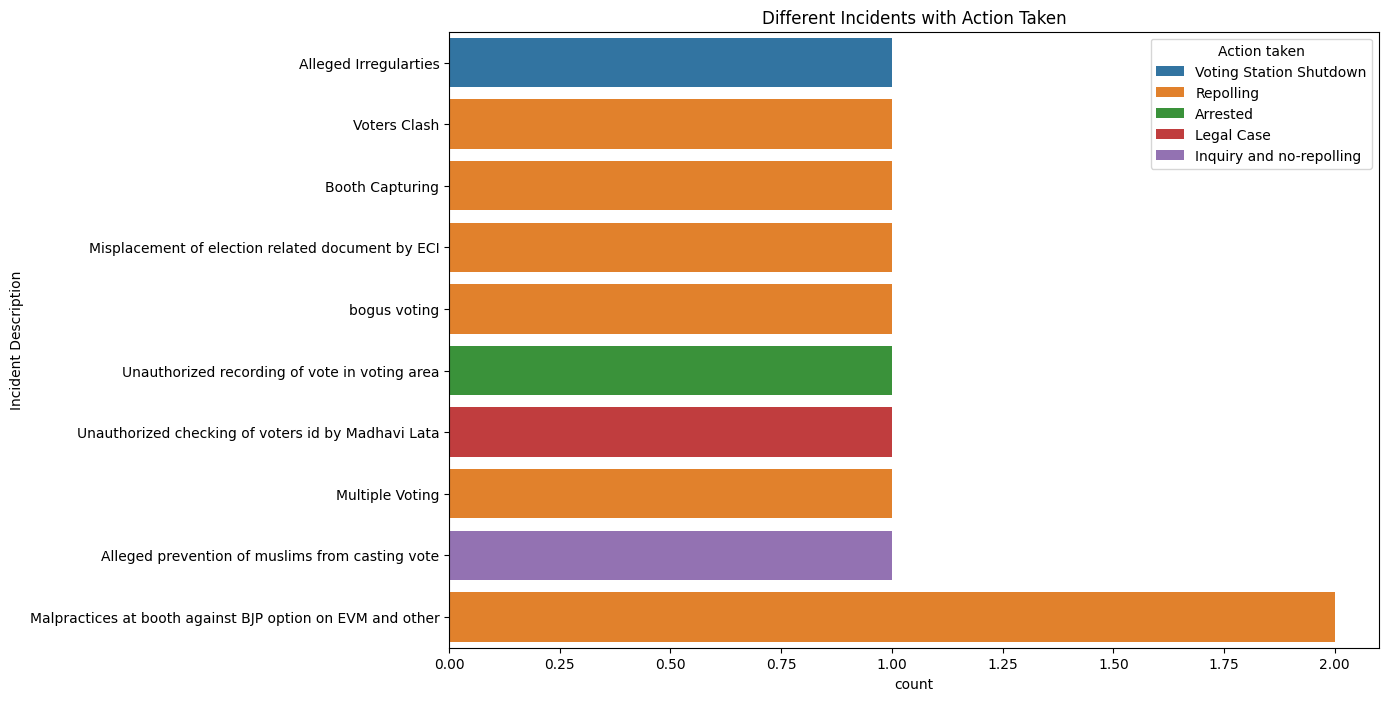

In [27]:
plt.figure(figsize=(12,8))
plt.title('Different Incidents with Action Taken')
sns.countplot(y='Incident Description', hue='Action taken', data=df)
plt.show()

## Incidents that has taken place with action taken, as one can see that Malpractices at booth against BJP option on EVM and other is more and hence repolling was introduced. And all other incidents do remain same with some having repolling , Arrested and so based on the incident description.

Code written and explained by RMS